In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cols = ['bed_depth','flow_rate','initial_concetration','time','ct_cu_meql']
list_dp = []
list_dp.append([3,2,0.6,10,0.001])
list_dp.append([3,2,0.6,20,0.004])
list_dp.append([3,2,0.6,30,0.003])
list_dp.append([3,2,0.6,40,0.002])
list_dp.append([3,2,0.6,50,0.005])
list_dp.append([3,2,0.6,60,0.005])
list_dp.append([3,2,0.6,90,0.012])
list_dp.append([3,2,0.6,120,0.024])
list_dp.append([3,2,0.6,150,0.042])
list_dp.append([3,2,0.6,180,0.060])
list_dp.append([3,2,0.6,240,0.092])
list_dp.append([3,2,0.6,300,0.113])
list_dp.append([3,2,0.6,420,0.173])
list_dp.append([3,2,0.6,540,0.221])
list_dp.append([3,2,0.6,660,0.271])
list_dp.append([3,2,0.6,760,0.305])
list_dp.append([3,2,0.6,1020,0.374])
list_dp.append([3,2,0.6,1200,0.405])
list_dp.append([3,2,0.6,1380,0.426])
list_dp.append([3,2,0.6,1500,0.448])
list_dp.append([3,2,0.6,1680,0.458])
list_dp.append([3,2,0.6,1860,0.483])
df2 = pd.DataFrame(list_dp, columns=cols)
df2

X = df2.iloc[:,:4].values
y = df2.iloc[:,4].values
m = df2.iloc[:,3].values


y.shape

(22,)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(8,input_dim=4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics =["mean_squared_error"])

model_fn=model.fit(X, y, epochs=700, batch_size=1)

Epoch 1/700
22/22 [==============================] - 1s 2ms/step - loss: 0.1265 - mean_squared_error: 0.1265
Epoch 2/700
22/22 [==============================] - 0s 1ms/step - loss: 0.1080 - mean_squared_error: 0.1080
Epoch 3/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 4/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 5/700
22/22 [==============================] - 0s 2ms/step - loss: 0.0685 - mean_squared_error: 0.0685    
Epoch 6/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 7/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 8/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 9/700
22/22 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0406    
Epoch 10/70

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_train= model.predict(X)
print(np.sqrt(mean_squared_error(y,pred_train)))

print(pred_train)

1/1 [==============================] - 0s 203ms/step
0.015198554104046975
[[0.02156525]
 [0.02254903]
 [0.02359715]
 [0.02471368]
 [0.02590284]
 [0.02716899]
 [0.03147513]
 [0.03664284]
 [0.04280248]
 [0.05007818]
 [0.0683658 ]
 [0.09187091]
 [0.15156198]
 [0.21659803]
 [0.27421412]
 [0.31302953]
 [0.38118085]
 [0.41105822]
 [0.4333424 ]
 [0.4454491 ]
 [0.46070552]
 [0.47333696]]


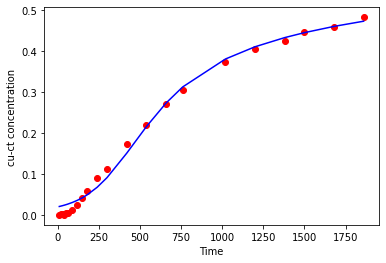

In [9]:
plt.scatter(m,y,color='red')
plt.plot(m,pred_train,color='blue')
plt.xlabel('Time')
plt.ylabel('cu-ct concentration')
plt.show()